# Investigation into FULL PLAYER DATASET obtained from basketball-reference.com

Will try analyse the full player database to achieve the same kinds of columns/variables as I produced manually above using a hand-made dataset...

### Import full player stat dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the downloaded Players.csv into a Pandas dataframe
players = pd.read_csv("Players.csv")
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
# fix typo in column header
players = players.rename(columns={'collage': 'college'})

In [4]:
# remove unnecessary columns
del players['Unnamed: 0'] # is a duplicate of the index column

players.head(10)

,Player,height,weight,college,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


### Plot a geo-map of birth_city or birth_state density

In [5]:
# to do
# Check out 'Vincent' mapping library (https://vincent.readthedocs.io/en/latest/)
# and here: http://wrobstory.github.io/2013/04/python-maps-choropleth.html

### Do some univariate analysis of the data

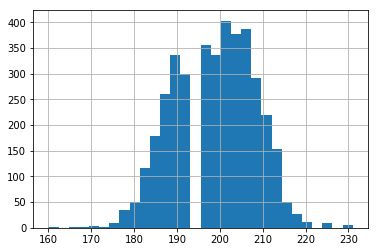

In [6]:
players['height'].hist(bins=30)

Why are there no players with heights of 194cm?

Also, who is that short guy?

In [7]:
players.loc[lambda players: players.height < 165, :]
#players.loc[players.Player == "Spud Webb"]

,Player,height,weight,college,born,birth_city,birth_state
1837,Muggsy Bogues,160.0,61.0,Wake Forest University,1965.0,Baltimore,Maryland


Thought so!

In [8]:
players.loc[lambda players: players.height > 230, :]

,Player,height,weight,college,born,birth_city,birth_state
1711,Manute Bol,231.0,90.0,University of Bridgeport,1962.0,Gogrial,South Sudan
2297,Gheorghe Muresan,231.0,137.0,NaN,1971.0,Triteni,Romania


## Load dataset containing full playing stats

In [9]:
# load the FULL stats file (downloaded from Kaggle)
full_stats = pd.read_csv('Seasons_Stats.csv')

In [10]:
del full_stats['Unnamed: 0']
full_stats.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [11]:
# check on the data types in the dataframe
type(full_stats)
#full_stats.dtypes

pandas.core.frame.DataFrame

Can't find MJ in this dataset!!

In [12]:
# Trying to find MJ!!!
mj = full_stats[(full_stats['Player'] == 'Michael Jordan*')]

Found him! He had an asterisk after his name... I wonder what that means

In [13]:
mj

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7716,1985.0,Michael Jordan*,SG,21.0,CHI,82.0,82.0,3144.0,25.8,0.592,...,0.845,167.0,367.0,534.0,481.0,196.0,69.0,291.0,285.0,2313.0
8094,1986.0,Michael Jordan*,SG,22.0,CHI,18.0,7.0,451.0,27.5,0.533,...,0.840,23.0,41.0,64.0,53.0,37.0,21.0,45.0,46.0,408.0
8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,0.562,...,0.857,166.0,264.0,430.0,377.0,236.0,125.0,272.0,237.0,3041.0
8869,1988.0,Michael Jordan*,SG,24.0,CHI,82.0,82.0,3311.0,31.7,0.603,...,0.841,139.0,310.0,449.0,485.0,259.0,131.0,252.0,270.0,2868.0
9297,1989.0,Michael Jordan*,SG,25.0,CHI,81.0,81.0,3255.0,31.1,0.614,...,0.850,149.0,503.0,652.0,650.0,234.0,65.0,290.0,247.0,2633.0
9747,1990.0,Michael Jordan*,SG,26.0,CHI,82.0,82.0,3197.0,31.2,0.606,...,0.848,143.0,422.0,565.0,519.0,227.0,54.0,247.0,241.0,2753.0
10212,1991.0,Michael Jordan*,SG,27.0,CHI,82.0,82.0,3034.0,31.6,0.605,...,0.851,118.0,374.0,492.0,453.0,223.0,83.0,202.0,229.0,2580.0
10666,1992.0,Michael Jordan*,SG,28.0,CHI,80.0,80.0,3102.0,27.7,0.579,...,0.832,91.0,420.0,511.0,489.0,182.0,75.0,200.0,201.0,2404.0
11106,1993.0,Michael Jordan*,SG,29.0,CHI,78.0,78.0,3067.0,29.7,0.564,...,0.837,135.0,387.0,522.0,428.0,221.0,61.0,207.0,188.0,2541.0
12048,1995.0,Michael Jordan*,SG,31.0,CHI,17.0,17.0,668.0,22.1,0.493,...,0.801,25.0,92.0,117.0,90.0,30.0,13.0,35.0,47.0,457.0


In [14]:
# What does the trailing asterisk mean?
# see this stackoverflow page: https://stackoverflow.com/questions/11350770/pandas-dataframe-select-by-partial-string
asterisks = full_stats[full_stats['Player'].str.endswith('*')==True]

In [15]:
asterisks

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
32,1950.0,Al Cervi*,PG,32.0,SYR,56.0,NaN,NaN,NaN,0.491,...,0.829,NaN,NaN,NaN,264.0,NaN,NaN,NaN,223.0,573.0
49,1950.0,Bob Davies*,PG,30.0,ROC,64.0,NaN,NaN,NaN,0.430,...,0.752,NaN,NaN,NaN,294.0,NaN,NaN,NaN,187.0,895.0
68,1950.0,Joe Fulks*,PF,28.0,PHW,68.0,NaN,NaN,NaN,0.346,...,0.696,NaN,NaN,NaN,56.0,NaN,NaN,NaN,240.0,965.0
71,1950.0,Harry Gallatin*,F-C,22.0,NYK,68.0,NaN,NaN,NaN,0.487,...,0.757,NaN,NaN,NaN,56.0,NaN,NaN,NaN,215.0,803.0
92,1950.0,Alex Hannum*,PF,26.0,SYR,64.0,NaN,NaN,NaN,0.423,...,0.688,NaN,NaN,NaN,129.0,NaN,NaN,NaN,264.0,482.0
108,1950.0,Red Holzman*,PG,29.0,ROC,68.0,NaN,NaN,NaN,0.388,...,0.686,NaN,NaN,NaN,200.0,NaN,NaN,NaN,67.0,556.0
112,1950.0,Buddy Jeannette*,G,32.0,BLB,37.0,NaN,NaN,NaN,0.467,...,0.820,NaN,NaN,NaN,93.0,NaN,NaN,NaN,82.0,193.0
148,1950.0,Ed Macauley*,C-F,21.0,STB,67.0,NaN,NaN,NaN,0.485,...,0.718,NaN,NaN,NaN,200.0,NaN,NaN,NaN,221.0,1081.0
157,1950.0,Slater Martin*,PG,24.0,MNL,67.0,NaN,NaN,NaN,0.395,...,0.634,NaN,NaN,NaN,148.0,NaN,NaN,NaN,162.0,271.0
163,1950.0,Dick McGuire*,PG,24.0,NYK,68.0,NaN,NaN,NaN,0.417,...,0.652,NaN,NaN,NaN,386.0,NaN,NaN,NaN,160.0,584.0


**It looks like HEAPS of entries end with an asterisk!**

They're all pretty good... Does this indicate that they're in the Hall of Fame? Will remove the asterics in the mean time.

In [16]:
# Remove asterics function
def strip_astrics(frame, col_name):
    for n in frame[col_name]:
        try:
            if n.endswith('*'):
                frame[col_name] = frame[col_name].replace(n, n[:-1])
        except:
            continue
    return frame

In [17]:
full_stats = strip_astrics(full_stats, 'Player')

In [18]:
full_stats[full_stats.Player.str.startswith('Michael Jor') == True][:5]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
7716,1985.0,Michael Jordan,SG,21.0,CHI,82.0,82.0,3144.0,25.8,0.592,...,0.845,167.0,367.0,534.0,481.0,196.0,69.0,291.0,285.0,2313.0
8094,1986.0,Michael Jordan,SG,22.0,CHI,18.0,7.0,451.0,27.5,0.533,...,0.840,23.0,41.0,64.0,53.0,37.0,21.0,45.0,46.0,408.0
8469,1987.0,Michael Jordan,SG,23.0,CHI,82.0,82.0,3281.0,29.8,0.562,...,0.857,166.0,264.0,430.0,377.0,236.0,125.0,272.0,237.0,3041.0
8869,1988.0,Michael Jordan,SG,24.0,CHI,82.0,82.0,3311.0,31.7,0.603,...,0.841,139.0,310.0,449.0,485.0,259.0,131.0,252.0,270.0,2868.0
9297,1989.0,Michael Jordan,SG,25.0,CHI,81.0,81.0,3255.0,31.1,0.614,...,0.850,149.0,503.0,652.0,650.0,234.0,65.0,290.0,247.0,2633.0


### Create sub-dataframes grouped by year, with only a few key stats

Group by year and take the average (.mean()) over their whole career for the variables.

In [19]:
by_year = full_stats.groupby(['Year'])['TS%', '3PA', '3P%', 'eFG%', 'AST%', 'MP', 'G', 'GS'].mean() # Take season AVG's for these stats
by_year['MPG'] = by_year['MP'] / by_year['G']

In [20]:
by_year.tail(5)

,TS%,3PA,3P%,eFG%,AST%,MP,G,GS,MPG
Year,,,,,,,,,
2013.0,0.499309,92.422339,0.282299,0.465942,13.022902,1112.923211,49.219895,22.499127,22.611247
2014.0,0.506709,95.643208,0.289736,0.474089,12.365466,1066.883797,46.780687,21.430442,22.806074
2015.0,0.505974,97.419355,0.286454,0.472817,13.607220,1041.775730,45.960061,21.099846,22.666979
2016.0,0.523400,110.534602,0.297648,0.490890,13.232353,1104.809689,49.162630,22.586505,22.472551
2017.0,0.526799,122.917647,0.301148,0.494481,12.771261,1090.680672,48.433613,22.136134,22.519085


In [21]:
# Check the stats on the stats
by_year.describe()

,TS%,3PA,3P%,eFG%,AST%,MP,G,GS,MPG
count,68.000000,38.000000,38.000000,68.000000,53.000000,66.000000,68.000000,38.000000,66.000000
mean,0.480089,58.774203,0.240292,0.434293,12.936532,1264.556712,52.211075,24.246354,24.063187
std,0.034870,31.126844,0.047200,0.043317,0.670376,145.175476,5.169498,2.903469,0.923142
min,0.384032,11.462810,0.138080,0.318109,11.086466,731.723866,31.406312,15.047337,22.472551
25%,0.462625,33.188476,0.201214,0.416588,12.444891,1165.704362,49.117824,22.641588,23.376026
50%,0.493793,68.002978,0.264239,0.451874,13.051812,1277.005222,52.839918,24.291265,23.775330
75%,0.505271,80.956100,0.273673,0.464098,13.392339,1372.855358,55.832209,25.589532,24.859050
max,0.526799,122.917647,0.301148,0.494481,14.262611,1513.887218,61.030075,31.846154,26.278431


The 3-pt stats have significantly fewer counts, as there was no 3-pt line until 1980.

### Plot some time-series line plots

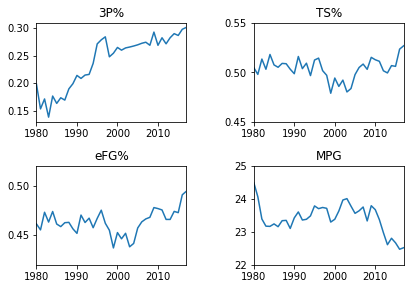

In [22]:
# Plot some stuff with matplotlib

# 3 point percentage
plt.subplot(221) # check out here for info: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
plt.plot(by_year['3P%'])
plt.title('3P%')
plt.xlim(1980, 2017)

# True shooting
plt.subplot(222)
plt.plot(by_year['TS%'])
plt.title('TS%')
plt.xlim(1980, 2017)
plt.ylim(0.45, 0.55)

# 3 point percentage
plt.subplot(223)
plt.plot(by_year['eFG%'])
plt.title('eFG%')
plt.xlim(1980, 2017)
plt.ylim(0.42, 0.52)

# Mins played
plt.subplot(224) # check out here for info: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
plt.plot(by_year['MPG'])
plt.title('MPG')
plt.xlim(1980, 2017)
plt.ylim(22, 25)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
plt.show()

Is 2017 a bumper year for shooting efficiencies? Also, there appears to be a steady decline in the average minutes played per season -- however, the sharp dips before the year 2000 and the year 2011 are due to the lock-out shortened seasons. Would be better to plot this as a per game average... (UPDATE: changed to MPG!)

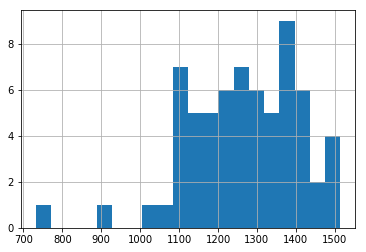

In [23]:
by_year['MP'].hist(bins=20)

Can see here the two lockout seasons with total minutes played as < 1000.

### Merge the df's 'players' and 'full_stats' on players name

In [24]:
players_and_stats = pd.merge(players, full_stats, on='Player', how='right')

In [25]:
players_and_stats.head(15)

,Player,height,weight,college,born,birth_city,birth_state,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1950.0,G-F,31.0,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1951.0,G-F,32.0,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950.0,SG,29.0,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
3,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1951.0,SG,30.0,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
4,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1952.0,SG,31.0,...,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0
5,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950.0,SF,25.0,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
6,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1951.0,SF,26.0,...,0.689,NaN,NaN,296.0,218.0,NaN,NaN,NaN,197.0,546.0
7,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1952.0,SF,27.0,...,0.652,NaN,NaN,430.0,255.0,NaN,NaN,NaN,196.0,820.0
8,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1953.0,SF,28.0,...,0.629,NaN,NaN,483.0,277.0,NaN,NaN,NaN,245.0,967.0
9,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1954.0,F-G,29.0,...,0.716,NaN,NaN,297.0,226.0,NaN,NaN,NaN,203.0,461.0


### Add PPG columns

In [26]:
players_and_stats['PPG'] = players_and_stats['PTS'] / players_and_stats['G']

In [27]:
# There are 58(?) columns in this df -- what are all the columns?
list(players_and_stats)

['Player',
 'height',
 'weight',
 'college',
 'born',
 'birth_city',
 'birth_state',
 'Year',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'blanl',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'blank2',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'PPG']

In [28]:
# 'blank2'  and 'blanl' cols appear to be just all NaN -- delete them
print(players_and_stats['blanl'].head())
print(players_and_stats['blanl'].tail())

del players_and_stats['blank2']
del players_and_stats['blanl']

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: blanl, dtype: float64
24686   NaN
24687   NaN
24688   NaN
24689   NaN
24690   NaN
Name: blanl, dtype: float64


In [29]:
players_and_stats.describe()

,height,weight,born,Year,Age,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG
count,23132.000000,23132.000000,23132.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,...,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000,24624.000000
mean,199.418857,95.554513,1964.821719,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,...,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350,8.307698
std,9.322390,11.977502,17.392829,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,...,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981,6.075255
min,160.000000,60.000000,1913.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193.000000,86.000000,1954.000000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,...,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000,3.583333
50%,201.000000,95.000000,1967.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,...,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000,6.794872
75%,206.000000,104.000000,1979.000000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,...,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000,11.741162
max,231.000000,163.000000,1997.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,...,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,50.362500


In [30]:
player_adv_stats = players_and_stats.groupby(['Player'])['PER', 'OBPM', 'DBPM', 'WS/48', 'VORP'].mean()
player_adv_stats['WS/48'].sort_values(ascending=False).head(20)

Player
Chad Gallagher       1.442000
Tyson Wheeler        1.367000
Dave Scholz          1.316000
Ian Lockhart         1.084000
Steven Hill          0.873000
Frank Reddout        0.802000
Bill Stricker        0.770000
Cozell McQueen       0.627000
Cedric Lewis         0.613000
Mel Peterson         0.514000
Jackie Butler        0.486000
DeAndre Liggins      0.410833
Sim Bhullar          0.389000
Demetrius Jackson    0.386000
Bob Miller           0.360000
Trey Gilder          0.336000
Al Cervi             0.318000
Nate DeLong          0.309000
Yvon Joseph          0.309000
Boban Marjanovic     0.302500
Name: WS/48, dtype: float64

## Look at 'modern NBA' (from 1985 on) only

In [31]:
modern_stats = players_and_stats.loc[lambda players_and_stats: players_and_stats.Year >= 1985.0, :]

In [32]:
# The team column ('Tm') seems to contain an unnecessary index... Slice to just the last 3 letters of str
modern_stats.head(5)

,Player,height,weight,college,born,birth_city,birth_state,Year,Pos,Age,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG
1330,Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,1985.0,SG,27.0,...,69.0,153.0,222.0,264.0,101.0,5.0,108.0,115.0,1218.0,17.911765
1331,Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,1986.0,SG,28.0,...,42.0,106.0,148.0,278.0,94.0,5.0,112.0,156.0,981.0,13.080000
1332,Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,1987.0,SG,29.0,...,41.0,98.0,139.0,237.0,76.0,12.0,108.0,134.0,874.0,12.138889
1333,Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,1988.0,SG,30.0,...,15.0,30.0,45.0,76.0,30.0,5.0,39.0,73.0,347.0,7.711111
1334,Jim Paxson,198.0,90.0,University of Dayton,1932.0,Pennville,Indiana,1988.0,SG,30.0,...,8.0,10.0,18.0,27.0,7.0,1.0,11.0,29.0,103.0,6.058824


In [33]:
modern_stats.describe()

,height,weight,born,Year,Age,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG
count,16637.000000,16637.000000,16637.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17095.000000,17025.000000,...,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000,17100.000000
mean,200.196670,97.147142,1972.910861,2002.224678,26.920292,48.948596,23.374444,1144.393918,12.369348,0.503499,...,57.996374,142.013333,200.009708,107.438012,37.733626,23.622456,69.631462,104.836023,474.306550,7.937336
std,9.558222,12.512494,11.868587,9.318747,4.060960,26.614972,28.492664,921.536847,6.304870,0.096098,...,64.531864,140.750146,199.639577,136.365381,37.144358,35.831814,64.744795,78.857949,472.964315,5.922464
min,160.000000,60.000000,1920.000000,1985.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,193.000000,88.000000,1965.000000,1995.000000,24.000000,25.000000,0.000000,299.000000,9.600000,0.472000,...,11.000000,31.000000,44.000000,16.000000,8.000000,3.000000,17.000000,33.000000,90.000000,3.321429
50%,201.000000,97.000000,1973.000000,2003.000000,26.000000,53.000000,8.000000,958.000000,12.600000,0.516000,...,34.000000,103.000000,142.000000,58.000000,27.000000,11.000000,52.000000,95.000000,325.000000,6.366432
75%,208.000000,106.000000,1982.000000,2010.000000,30.000000,74.000000,45.000000,1863.000000,15.600000,0.552000,...,84.000000,207.000000,290.000000,145.000000,56.000000,29.000000,106.000000,164.000000,731.000000,11.338744
max,231.000000,163.000000,1997.000000,2017.000000,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,...,523.000000,1007.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,371.000000,3041.000000,37.085366


In [34]:
modern_stats['Tm'].loc[(modern_stats.Player == 'Magic Johnson') & (modern_stats.Year == 1991)]

24306    LAL
Name: Tm, dtype: object

### As this code was pulled from basketball-reference.com, can I write a function to actually FIND the traded players in the dataset?

i.e., "if player_name has two (or more) entries in the same year, then he must have changed teams that year"

### Write code to make dictionary of players and the years they were active


In [35]:
# try loop through this df to sort out double-ups in years...
players_active_years = defaultdict(list)

for index, row in modern_stats.iterrows():
    players_active_years[row['Player']].append(row['Year'])

In [36]:
players_active_years['Gary Payton']

[1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2003.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2017.0]

### Remove the 'TOT' entry for players that played for multiple teams in one year

We can always recreate these entries if we need them later.

In [37]:
modern_stats[modern_stats.Player == 'Jusuf Nurkic'][['Tm', 'DRB', 'G']]

,Tm,DRB,G
22857,DEN,257.0,62.0
22858,DEN,110.0,32.0
22859,TOT,313.0,65.0
22860,DEN,171.0,45.0
22861,POR,142.0,20.0


In [38]:
# Remove rows that calculate the TOTAL of two teams a player played for in one season - i.e. doubled up data
modern_stats = modern_stats[modern_stats.Tm != "TOT"]
modern_stats[modern_stats.Player == 'Jusuf Nurkic'][['Tm', 'DRB', 'G']]

,Tm,DRB,G
22857,DEN,257.0,62.0
22858,DEN,110.0,32.0
22860,DEN,171.0,45.0
22861,POR,142.0,20.0


### Now need to loop through the dict values (lists) to find double-ups in the years

In [39]:
# loop through active years for players in dict 'players_active_years'
traded_player_dict = defaultdict(list)

for player, years in players_active_years.items():   # note: change to .items() for python 3.
    
    # use the 'Counter()' method from Collections to track years that are doubled-up in the 'years' list
    traded_player_dict[player] = [year for year, count in Counter(years).items() if count > 1]
    
    # remove any players that don't have year double-ups...
    if not traded_player_dict[player]:  # this uses the inherent Boolean nature of the list obj directly!
        del traded_player_dict[player]

In [40]:
traded_player_dict

defaultdict(list,
            {'Jim Paxson': [1988.0],
             'Luke Jackson': [2007.0],
             'George Johnson': [1985.0, 1986.0],
             'Darryl Dawkins': [1988.0],
             'Johnny Davis': [1986.0],
             'Mike Dunleavy': [2007.0, 2017.0],
             'Bobby Jones': [2008.0],
             'Billy Knight': [1985.0],
             'Walter Davis': [1991.0],
             'James Edwards': [1988.0],
             'Rickey Green': [1989.0],
             'Eddie Johnson': [1985.0, 1986.0, 1987.0, 1991.0, 1997.0],
             'Cedric Maxwell': [1987.0],
             'Ben Poquette': [1987.0],
             'Robert Reid': [1990.0],
             'Ray Williams': [1986.0],
             'Ron Brewer': [1985.0, 1986.0],
             'Maurice Cheeks': [1990.0],
             'John Long': [1989.0],
             'Mychal Thompson': [1987.0],
             'Jerome Whitehead': [1989.0],
             'Dudley Bradley': [1988.0],
             'Jeff Cook': [1985.0, 1986.0],
             

In [41]:
len(traded_player_dict)

1041

Therefore, the number of players that have been traded in-season in our dataset is 1041!

## Now need to go back to the original dataframe ('modern_stats') and extract the rows for these players in the year(s) that they changed teams...

In [42]:
def players_traded(full_stats_df):
    '''
    Create a dict of for each player traded in-season (as the KEY), and return a VALUE that's a tuple of the
    YEAR they were traded and the TEAM they were on.
    
    Will also return a 'TOT' value, which is the TOTAL stats for that year for that player.
    '''
    
    player_team_year_traded = defaultdict(list)
    
    for player, years in traded_player_dict.items():
        
        for year in years:
            # Note: had to add .values to retrieve all of the 'Tm' value from that part of the df and not the index/type as well
            teams = full_stats_df['Tm'].loc[(modern_stats.Player == player) & (modern_stats.Year == year)].values.tolist()
            year_tm_tup = (year, teams)
            player_team_year_traded[player].append(year_tm_tup)
    
    return player_team_year_traded

In [43]:
traded_player_dict = players_traded(modern_stats)

**Great! Now we have a dict where the traded players are the keys, and the 'values' are lists of tuples, with each tuple-pair being the year the player was traded, and a list of the teams they were on that year!**

In [46]:
traded_player_dict

defaultdict(list,
            {'Jim Paxson': [(1988.0, ['POR', 'BOS'])],
             'Luke Jackson': [(2007.0, ['LAC', 'TOR'])],
             'George Johnson': [(1985.0, ['NJN', 'PHI']),
              (1986.0, ['SEA', 'WSB'])],
             'Darryl Dawkins': [(1988.0, ['UTA', 'DET'])],
             'Johnny Davis': [(1986.0, ['CLE', 'ATL'])],
             'Mike Dunleavy': [(2007.0, ['GSW', 'IND']),
              (2017.0, ['CLE', 'ATL'])],
             'Bobby Jones': [(2008.0, ['DEN', 'MEM', 'HOU', 'MIA', 'SAS'])],
             'Billy Knight': [(1985.0, ['KCK', 'SAS'])],
             'Walter Davis': [(1991.0, ['DEN', 'POR'])],
             'James Edwards': [(1988.0, ['PHO', 'DET'])],
             'Rickey Green': [(1989.0, ['CHH', 'MIL'])],
             'Eddie Johnson': [(1985.0, ['ATL', 'KCK']),
              (1986.0, ['SAC', 'ATL', 'CLE']),
              (1987.0, ['SEA', 'SAC']),
              (1991.0, ['PHO', 'SEA']),
              (1997.0, ['IND', 'HOU'])],
             'Cedric Maxwe

Let's restrict to players only traded ONE TIME in that season to make it a bit clearer...

In [47]:
# Iterate over each entry for this player, remove seasons where they played for 3+ teams
def only_once(d):
    for player, vals in d.items():
        for idx, entry in enumerate(vals):
            year, teams = entry
            if len(teams) > 2:
                del d[player][idx]
            else:
                continue
    return d

# Remove players
def rem_players(d):
    # If there are no trades that meet the cut-off criteria for this player, remove them from dict
    for player in list(d):
        if len(d[player]) == 0:
            del d[player]
    return d

In [48]:
traded_player_dict = only_once(traded_player_dict)
traded_player_dict = rem_players(traded_player_dict)

In [49]:
traded_player_dict

defaultdict(list,
            {'A.C. Green': [(1997.0, ['PHO', 'DAL'])],
             'Aaron Brooks': [(2011.0, ['HOU', 'PHO']),
              (2013.0, ['SAC', 'HOU']),
              (2014.0, ['HOU', 'DEN'])],
             'Aaron Gray': [(2010.0, ['CHI', 'NOH']),
              (2014.0, ['TOR', 'SAC'])],
             'Aaron McKie': [(1997.0, ['POR', 'DET']),
              (1998.0, ['DET', 'PHI'])],
             'Aaron Williams': [(1997.0, ['DEN', 'VAN']),
              (2005.0, ['NJN', 'TOR']),
              (2006.0, ['TOR', 'NOK'])],
             'Acie Earl': [(1997.0, ['TOR', 'MIL'])],
             'Acie Law': [(2011.0, ['MEM', 'GSW'])],
             'Adam Harrington': [(2003.0, ['DAL', 'DEN'])],
             'Adam Morrison': [(2009.0, ['CHA', 'LAL'])],
             'Adonal Foyle': [(2009.0, ['ORL', 'MEM'])],
             'Adonis Thomas': [(2014.0, ['ORL', 'PHI'])],
             'Adreian Payne': [(2015.0, ['ATL', 'MIN'])],
             'Adrian Caldwell': [(1997.0, ['NJN', 'PHI'])],
  

Perfect! Now we the have the data organised we need to go and retrieve the player stats for each portion of the respective trade seasons.

Actually, we could first try to make a SIMPLIFIED chord diagram that just linked up the trading partners for every trade made by year.

*Note: The DIRECTIONALITY of the trade actually appears to be embedded from the dataset, i.e. the player went from team at position 0 to team at position 1 of the list.*

### First, make a team name mapping function to unify the older team abbreviations to the modern ones

i.e. NOK -> NOP, VAN -> MEM, SEA -> OKC, WSB -> WAS, NOH -> NOP, NJN -> BKN, CHH -> CHA, CHO -> CHA, etc.

**Note: If fetching the full stat data for each player, don't do this re-naming step until the very end!**

In [99]:
def map_tm_names(d):
    team_map = {
        "NOK": "NOP",
        "VAN": "MEM",
        "SEA": "OKC",
        "WSB": "WAS",
        "NOH": "NOP",
        "NJN": "BKN",
        "CHH": "CHA",
        "CHO": "CHA",
        "KCK": "NYK",
        "BRK": "BKN"
    }
    
    for player, trades in d.items():
        for trade in trades:
            year, teams = trade
            for idx, team in enumerate(teams):
                if team in team_map:
                    teams[idx] = team_map[team]
    return d

In [100]:
traded_player_dict = map_tm_names(traded_player_dict)

In [101]:
len(traded_player_dict)

999

## Will convert back into a Pandas dataframe for viewing simplicity

In [102]:
# Create separate python lists for each 'column' that we want in the df

def to_lists(d):
    players = []
    year = []
    team_1 = []
    team_2 = []

    for player, trades in d.items():
        for trade in trades:
            yr, teams = trade
            
            # add data to the lists
            players.append(player)
            year.append(yr)
            team_1.append(teams[0])
            team_2.append(teams[1])
            
    return players, year, team_1, team_2   

In [103]:
players, year, team_1, team_2 = to_lists(traded_player_dict)

In [104]:
print(len(players))
print(len(year))
print(len(team_1))
print(len(team_2))

1412
1412
1412
1412


We have 999 players in the 'traded_player_dict', but there are 1412 recorded trades in this dict... That seems about right.

In [105]:
df = pd.DataFrame({
    'Player': players,
    'Year': year,
    'Team_1': team_1,
    'Team_2': team_2
})

df.head(10)

,Player,Team_1,Team_2,Year
0,Jim Paxson,POR,BOS,1988.0
1,Luke Jackson,LAC,TOR,2007.0
2,George Johnson,BKN,PHI,1985.0
3,George Johnson,OKC,WAS,1986.0
4,Darryl Dawkins,UTA,DET,1988.0
5,Johnny Davis,CLE,ATL,1986.0
6,Mike Dunleavy,GSW,IND,2007.0
7,Mike Dunleavy,CLE,ATL,2017.0
8,Billy Knight,NYK,SAS,1985.0
9,Walter Davis,DEN,POR,1991.0


In [113]:
p = df.loc[(df.Team_1 == "BOS") & (df.Team_2 == "BKN")]
p

,Player,Team_1,Team_2,Year
1313,Kris Joseph,BOS,BKN,2013.0


**Where is the KG/Paul Pierce trade??!**

In [114]:
df.loc[df.Player == "Kevin Garnett"]

,Player,Team_1,Team_2,Year
561,Kevin Garnett,BKN,MIN,2015.0


**Should try get to the bottom of this...**

## Prepare data into the 'matrix' format required for a chord diagram

In [106]:
# matrix = df.groupby(['Team_1', 'Team_2', 'Year']).count()
matrix = df.groupby(['Team_1', 'Team_2'])['Player'].count()  # without 'Year' data - i.e., all time

In [107]:
matrix.head(15)

Team_1  Team_2
ATL     BOS       2
        CHI       2
        CLE       4
        DAL       3
        DET       1
        GSW       1
        HOU       2
        LAC       2
        MIA       1
        MIL       1
        MIN       4
        NYK       2
        ORL       1
        PHI       4
        PHO       1
Name: Player, dtype: int64

In [108]:
matrix = matrix.unstack(level=1).fillna(0) # unstack the second level (i.e. idx 1)

In [110]:
matrix

Team_2,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
Team_1,,,,,,,,,,,,,,,,,,,,,
ATL,0.0,0.0,2.0,0.0,2.0,4.0,3.0,0.0,1.0,1.0,...,0.0,1.0,4.0,1.0,4.0,7.0,0.0,1.0,1.0,2.0
BKN,2.0,0.0,2.0,3.0,1.0,2.0,10.0,1.0,1.0,0.0,...,1.0,2.0,6.0,1.0,0.0,1.0,1.0,3.0,3.0,3.0
BOS,2.0,1.0,0.0,1.0,0.0,7.0,4.0,1.0,1.0,3.0,...,2.0,0.0,0.0,4.0,2.0,2.0,0.0,5.0,1.0,1.0
CHA,0.0,4.0,1.0,0.0,2.0,1.0,2.0,4.0,1.0,6.0,...,1.0,2.0,4.0,3.0,2.0,0.0,4.0,0.0,0.0,2.0
CHI,1.0,2.0,2.0,1.0,0.0,6.0,1.0,0.0,0.0,2.0,...,5.0,0.0,3.0,2.0,1.0,3.0,0.0,5.0,0.0,0.0
CLE,4.0,3.0,6.0,1.0,6.0,0.0,1.0,0.0,0.0,3.0,...,3.0,1.0,4.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0
DAL,4.0,9.0,2.0,2.0,0.0,2.0,0.0,4.0,1.0,2.0,...,1.0,1.0,1.0,5.0,0.0,0.0,1.0,2.0,1.0,7.0
DEN,0.0,3.0,1.0,3.0,0.0,1.0,4.0,0.0,3.0,4.0,...,4.0,3.0,4.0,0.0,7.0,0.0,3.0,2.0,2.0,3.0
DET,4.0,1.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,...,3.0,4.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0


**This is now in the correct format for the chord diagram!**